In [1]:

# ***********************************************************************************
#      Python Version check for libraries compatibility
# ***********************************************************************************

from platform import python_version
print(python_version())

3.7.6


    Name: Sathish Kumar Rajendiran & Prasad Kulkarni
    Group : 2
    Task: Homework 2: Semistructured Data
    Date: 8/5/2020
 
     Semistructured Data Processing
         The main outline of your assignment is to write a program that will read in JSON formatted data from a Mongo DB collection or from a file. This will be in a format that is structured with lines of data representing one type of unit, for example, one tweet for Twitter or one post from Facebook. Your program will contain the data as lists of JSON structures, which are just Python dictionaries and lists. Your program may also contain pandas dataframes for processed data.
         The program will do some processing to collect data from some of the fields that will answer one or more questions as described below, and write a file with the data suitable for answering each question. Remember that some fields may be optional or have null values, so you may need to test for those conditions. Graphing is definitely optional.
         
    Tweets
    Retweets
    Likes
    Direct messages
    Favorites
    Trends
    Media

In [ ]:

# ***********************************************************************************
#      package installation
# ***********************************************************************************

# !pip install tweepy
# !pip install tweet-preprocessor
# !pip install wordcloud

In [1]:

# ***********************************************************************************
#      import libraries
# ***********************************************************************************

# standard library
import os
import sys
from datetime import datetime
import time
import re
import timeit

# csv, xls, pandas & json
import pandas as pd
import json
import csv
import xlrd
import numpy as np

#twitter libraries
import tweepy
from tweepy import StreamListener
from tweepy import Stream
import preprocessor as p
    
# from tweet-preprocessor import clean,tokenize,parse

#MongoDB libraries
import pymongo
from pymongo import MongoClient

#visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
%matplotlib inline

print('Libraries imported successfully!\n')
os.getcwd()

Libraries imported successfully!



'/Users/sathishrajendiran/ist652-python/HW2'

In [2]:

# ***********************************************************************************
#       Twitter credentials file
# ***********************************************************************************

# ls *.xls

#create dummy dictionary
di = {}
# define file name
infile = 'tw_credentials.xls'

# Working with file
try: 
    df = pd.read_excel(infile, encoding='utf-16')
    di = df.to_dict()
    print("data has been processed \n")
except:
    print("Is the file in correct directory?")

data has been processed 



In [ ]:
# print(di)

In [3]:

# ***********************************************************************************
#       Twitter feeds keywords collection
# ***********************************************************************************


#  words = ['#LA', '#LosAngeles', '#LAtraffic', '#accidents','#hollywood',
#         '#LAFD','#Wildfire','#LAHeatWave','#STREETCLOSURE','#car']

words = ['#LA', '#LosAngeles', '#LAtraffic','#LAFD','#LASTREETCLOSURE']  # key words

lang=['en']  # language - english

print("search words ready")

search words ready


In [4]:

# ***********************************************************************************
#       Define Twitter streaming feed into MongoDB collection
# ***********************************************************************************

class TwitterStream(tweepy.StreamListener):
    
        def on_connect(self):
        # Function called to connect to the Twitter Streaming API
            print('\nTweets follow...')

        def on_status(self,status):
            if status.retweeted_status:
                return
            print(status.text)

        def on_error(self,status_code):
            print('Encounted Streaming error('',status_code,'')')
            return False

        def on_data(self, data): 
            try:

                datajson = json.loads(data)
                tweet_message = datajson['text']
                print('\n',tweet_message)

                tweetscoll.insert(datajson)

            except Exception as e:
                   print(e)
print("streaming api listening...")

streaming api listening...


In [5]:

# ***********************************************************************************
#       Main function to stream Tweets into MongoDB collection
# ***********************************************************************************


#main function
if __name__ == "__main__":
    
        #Twitter connection details 

        #assign it to variables
        for key,val in di.items():
            consumer_key = val[0]
            consumer_secret = val[1]
            access_token = val[2]
            access_secret = val[3]

        # test authentication
        try:
            auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
            auth.set_access_token(access_token, access_secret)
            api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
            api.verify_credentials()
            print('Authentication OK - You''re now connected to the Twitter API.\n')

        except:
            print('Error during authentication')

        # Connection to Mongo DB
        try:
            client = MongoClient('localhost', 27017)
            print ('Authentication OK - You''re now connected to the MongoDB.\n')

            # use database named usgs or create it if not there already
            twdb = client.tweetsdb
            # create collection named earthquakes or create it if not there already
            tweetscoll = twdb.tweets

            print('MongoDB database: ' + str(twdb))
            print('MongoDB collection:' + str(tweetscoll))
            
        except pymongo.errors.ConnectionFailure as e:
            print ('Could not connect to MongoDB: %s' % e )


            
        #intialize Stream
        try:
            print('\nStart Streaming...')
            print('Keywords:'  + str(words))
            print('Languages:'  + str(lang))
            listener = TwitterStream(api=tweepy.API(wait_on_rate_limit=True)) 
            streamer = tweepy.Stream(auth=auth, listener=listener,tweet_mode='extended')
            # print('Date Since:'  + str(date_since))
            streamer.filter(track=words,languages=lang,encoding='utf8',follow=None, )
            
        except KeyboardInterrupt as e :
            print("\nStopped.")
            
        finally:
            print('\nDone.')
            streamer.disconnect()
            client.close()

Authentication OK - Youre now connected to the Twitter API.

Authentication OK - Youre now connected to the MongoDB.

MongoDB database: Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'tweetsdb')
MongoDB collection:Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'tweetsdb'), 'tweets')

Start Streaming...
Keywords:['#LA', '#LosAngeles', '#LAtraffic', '#LAFD', '#LASTREETCLOSURE']
Languages:['en']

Tweets follow...

 RT @IfyNwadiwe: Or I don’t know, maybe... just maybe... @MayorOfLA gets off of his ass, freezes rent, and stops eating the LAPD’s ass so ha…


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.



Stopped.

Done.


In [6]:
#print the number of docs from db
print('Total Number of Documents: ',tweetscoll.count_documents({}))

Total Number of Documents:  277284


In [7]:
#search the first item from the collection
tweetscoll.find_one()

{'_id': ObjectId('5f39fe371a3bc61df03bfac4'),
 'created_at': 'Mon Aug 17 03:49:06 +0000 2020',
 'id': 1295205989478731781,
 'id_str': '1295205989478731781',
 'text': 'Hurricane Awareness: Zephyr Insurance \n\nREAD MORE: https://t.co/SEhxK4bwyi\n\n#Accidents #Claims #DisasterMitigation… https://t.co/ew7ylyeHCz',
 'display_text_range': [0, 140],
 'source': '<a href="https://www.blog.iammarketingmedia.com" rel="nofollow">IAMBLOG2TWITTER</a>',
 'truncated': True,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 226310002,
  'id_str': '226310002',
  'name': 'IAM Platform',
  'screen_name': 'IAM__Network',
  'location': 'Worldwide',
  'url': 'https://www.iammarketingmedia.com',
  'description': 'Curation | Tools | Tips | Services\n\nIAM Platform powers IAM Network:\n\nGO: http://bit.ly/2Ywsbg8\n\nBlog | Social | Podcast | Code Trove',
  'translator_type': 'none

In [ ]:
# for doc in tweetscoll.find().limit(2):
#      print(doc)

In [8]:

# ***********************************************************************************
#       load data from MongoDB collection to python list object
# ***********************************************************************************

starttime = timeit.default_timer()
print("The start time is :",starttime)
tw_list =[]
# results = tweetscoll.find().limit(5) #limit to 5 items
results = tweetscoll.find()

for result in results:
    id = result['id']
    id_str = result['id_str']
    user = result['user']['name']
    source = result['source']
    followers = result['user']['followers_count']
    retweets = result['retweet_count']
    coords = result['coordinates']
    bg_color = result['user']['profile_background_color']
    unix_time_mil = result['timestamp_ms'] # select unix timestamp in milliseconds
    unix_time = int(unix_time_mil) / 1000     # convert to unix in seconds
    datets = datetime.fromtimestamp(unix_time).strftime('%Y-%m-%d %H:%M:%S')
    if (result['place'] is None):
        place = result['place']
    else:
        place = result['place']['full_name']
    if (result['truncated']==True):
        text = result['extended_tweet']['full_text']
    else:
        text = result['text']
    try:
        sensitivity = result['possibly_sensitive']
    except KeyError:
        sensitivity =''
    tw_list.append([id,id_str,user,source,followers,retweets,coords,bg_color,datets,text])

print('Total Number of Documents Processed: ',len(tw_list))

print("The time difference is :", timeit.default_timer() - starttime)

The start time is : 310.994599406
Total Number of Documents Processed:  277284
The time difference is : 64.834117548


In [10]:

# ***********************************************************************************
#       load data from python list into Pandas Dataframe
# ***********************************************************************************

#define column names
ColNames = ['id','id_str','user','source','followers','retweets','coords','bg_color','datets','text']

# Show all columns and do not truncate in the data frame
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

tweetsDF = pd.DataFrame(tw_list,columns=ColNames)

print('Total Number of rows Processed: ',len(tweetsDF))

Total Number of rows Processed:  277284


In [11]:
#Analyze Dataframe  - metadata
tweetsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277284 entries, 0 to 277283
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         277284 non-null  int64 
 1   id_str     277284 non-null  object
 2   user       277284 non-null  object
 3   source     277284 non-null  object
 4   followers  277284 non-null  int64 
 5   retweets   277284 non-null  int64 
 6   coords     1189 non-null    object
 7   bg_color   277284 non-null  object
 8   datets     277284 non-null  object
 9   text       277284 non-null  object
dtypes: int64(3), object(7)
memory usage: 21.2+ MB


In [ ]:
#Analyze Dataframe - top 5 rows

tweetsDF.head()

In [12]:
#Analyze Dataframe - shape
tweetsDF.shape

(277284, 10)

In [14]:

# ***********************************************************************************
#       Dataframe - Data Type conversion and Creation of Calender fields
# ***********************************************************************************

#convert datets values to float
tweetsDF['datets'] = tweetsDF['datets'].astype('datetime64[ns]')

#derive other calender items from date.today()
# tweetsDF['datets'].unique()

tweetsDF['date'] = tweetsDF['datets'].dt.date
tweetsDF['year'] = tweetsDF['datets'].dt.year
tweetsDF['month'] = tweetsDF['datets'].dt.month
tweetsDF['monthday'] = tweetsDF['datets'].dt.day
tweetsDF['weekday'] = tweetsDF['datets'].dt.weekday
tweetsDF['dayname'] = tweetsDF['datets'].dt.day_name()
tweetsDF['monthname'] = tweetsDF['datets'].dt.month_name()
tweetsDF['hour'] = tweetsDF['datets'].dt.hour
tweetsDF['minute'] = tweetsDF['datets'].dt.minute
tweetsDF['secs'] = tweetsDF['datets'].dt.second

tweetsDF.head()


,id,id_str,user,source,followers,retweets,coords,bg_color,datets,text,date,year,month,monthday,weekday,dayname,monthname,hour,minute,secs
0,1295205989478731781,1295205989478731781,IAM Platform,"<a href=""https://www.blog.iammarketingmedia.com"" rel=""nofollow"">IAMBLOG2TWITTER</a>",18016,0,None,94D487,2020-08-16 20:49:06,Hurricane Awareness: Zephyr Insurance \n\nREAD MORE: https://t.co/SEhxK4bwyi\n\n#Accidents #Claims #DisasterMitigation #Insurance #InsuranceTechnology #InsurTech #Points #RiskMitigation #Technology~ https://t.co/kCrl2YxHfK,2020-08-16,2020,8,16,6,Sunday,August,20,49,6
1,1295205997623926784,1295205997623926784,"Alison(Ally) Stapf(Freeman, Day)","<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",298,0,None,C0DEED,2020-08-16 20:49:08,RT @abc7chriscristi: I happen to think LAX is uniquely photogenic at night... for an airport. #air7hd @abc7 #abc7eyewitness #lax #airport #…,2020-08-16,2020,8,16,6,Sunday,August,20,49,8
2,1295206023523753984,1295206023523753984,DeAndre Jackson Media,"<a href=""http://instagram.com"" rel=""nofollow"">Instagram</a>",216,0,"{'type': 'Point', 'coordinates': [-118.2445, 34.0564]}",9AE4E8,2020-08-16 20:49:14,"Headshots and portraits, back open for business. DM for bookings. \n\n——————————————————————————— •\n•\n•\n\n#sony #modellife #fashionblogger #sonyalpha #fashion #losangeles #travelingphotographer #california #newyork… https://t.co/CmzuIO1JgK",2020-08-16,2020,8,16,6,Sunday,August,20,49,14
3,1295206235411591168,1295206235411591168,Louis Valverde,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",743,0,None,000000,2020-08-16 20:50:04,RT @abc7chriscristi: I happen to think LAX is uniquely photogenic at night... for an airport. #air7hd @abc7 #abc7eyewitness #lax #airport #…,2020-08-16,2020,8,16,6,Sunday,August,20,50,4
4,1295206317380874241,1295206317380874241,Alfredo,"<a href=""http://twitter.com/#!/download/ipad"" rel=""nofollow"">Twitter for iPad</a>",354,0,None,1A1B1F,2020-08-16 20:50:24,RT @abc7chriscristi: I happen to think LAX is uniquely photogenic at night... for an airport. #air7hd @abc7 #abc7eyewitness #lax #airport #…,2020-08-16,2020,8,16,6,Sunday,August,20,50,24


In [ ]:
#create a another dataframe for further analysis
# NewtweetsDF = pd.DataFrame()
# NewtweetsDF.info()
# NewtweetsDF=tweetsDF

In [ ]:
#  review the data frame
# NewtweetsDF.info()
# NewtweetsDF.head()

In [ ]:

# la_tweets = NewtweetsDF[NewtweetsDF['text'].str.contains('los angeles|latraffic|california|fire')]
# la_tweets.shape

In [ ]:
# NewtweetsDF.tail()

In [ ]:
# NewtweetsDF.info()

In [15]:
#data spread- Cleanup tweet and username fields using preprocessor api library
#split the dataframe into two splits for processing

# ***********************************************************************************
#       Dataframe - Pre Processing - Temp1
# ***********************************************************************************

starttime = timeit.default_timer()
print("The start time is :",starttime)
tempDF1 = tweetsDF[tweetsDF['text'].str.startswith('RT')==True]
# retweetsDF.info() #184624
tempDF1 = tempDF1.reset_index()
print("The time difference is :", timeit.default_timer() - starttime)

The start time is : 766.21777337
The time difference is : 0.596149344999958


In [ ]:
# tempDF1.index

In [16]:
# ***********************************************************************************
#       Dataframe - Cleanup tweet and username words from special words
# ***********************************************************************************

starttime = timeit.default_timer()
print("The start time is :",starttime)
tempDF1['tweet']=''
tempDF1['username']=''
for i in tempDF1.index:
    tempDF1['tweet'][i]= p.clean(tempDF1['text'].iloc[i])
    tempDF1['username'][i]= p.clean(tempDF1['user'].iloc[i])
    i += 1
#     print("i", i)
print("items updated already!")
print("The time difference is :", timeit.default_timer() - starttime)

The start time is : 786.470096723


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


items updated already!
The time difference is : 438.9718246599999


In [17]:

# ***********************************************************************************
#       Dataframe - Pre Processing - Temp2
# ***********************************************************************************

#data spread- Cleanup tweet and username fields using preprocessor api library
starttime = timeit.default_timer()
print("The start time is :",starttime)
tempDF2 = tweetsDF[tweetsDF['text'].str.startswith('RT')==False]
tempDF2 = tempDF2.reset_index()
print("The time difference is :", timeit.default_timer() - starttime)

The start time is : 1285.329067655
The time difference is : 0.34198545899994315


In [20]:
tempDF2.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            56211, 56212, 56213, 56214, 56215, 56216, 56217, 56218, 56219,
            56220],
           dtype='int64', length=56221)

In [19]:
# cleanup unwanted entries
tempDF2.drop(tempDF2.index[56221:len(tempDF2.index)],inplace=True)

In [21]:
#data spread- Cleanup tweet and username fields using preprocessor api library
starttime = timeit.default_timer()
print("The start time is :",starttime)
tempDF2['tweet']=''
tempDF2['username']=''
for i in tempDF2.index:
    tempDF2['tweet'][i]= p.clean(tempDF2['text'].iloc[i])
    tempDF2['username'][i]= p.clean(tempDF2['user'].iloc[i])
    i += 1
#     print("i", i)
print("items updated already!")
print("The time difference is :", timeit.default_timer() - starttime)

The start time is : 1459.974208725


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


items updated already!
The time difference is : 59.14983893099998


In [ ]:
# tempDF2.info()
# tempDF1.tail(100)

In [22]:

# ***********************************************************************************
#       Create a cleaner dataframe
# ***********************************************************************************

NewtweetsDF= pd.concat([tempDF1,tempDF2],ignore_index = True)
NewtweetsDF = NewtweetsDF.reset_index()
# NewtweetsDF.info()

In [23]:

# ***********************************************************************************
#       Remove a href & url text from "Source" to collect platform info
# ***********************************************************************************

NewtweetsDF['platform'] = NewtweetsDF['source'].str.extract('(>.*(?=</))')
NewtweetsDF['platform'] = NewtweetsDF['platform'].str.replace('>','')
NewtweetsDF.head()

,level_0,index,id,id_str,user,source,followers,retweets,coords,bg_color,datets,text,date,year,month,monthday,weekday,dayname,monthname,hour,minute,secs,tweet,username,platform
0,0,1,1295205997623926784,1295205997623926784,"Alison(Ally) Stapf(Freeman, Day)","<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",298,0,None,C0DEED,2020-08-16 20:49:08,RT @abc7chriscristi: I happen to think LAX is uniquely photogenic at night... for an airport. #air7hd @abc7 #abc7eyewitness #lax #airport #…,2020-08-16,2020,8,16,6,Sunday,August,20,49,8,: I happen to think LAX is uniquely photogenic at night... for an airport.,"Alison(Ally) Stapf(Freeman, Day)",Twitter Web App
1,1,3,1295206235411591168,1295206235411591168,Louis Valverde,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",743,0,None,000000,2020-08-16 20:50:04,RT @abc7chriscristi: I happen to think LAX is uniquely photogenic at night... for an airport. #air7hd @abc7 #abc7eyewitness #lax #airport #…,2020-08-16,2020,8,16,6,Sunday,August,20,50,4,: I happen to think LAX is uniquely photogenic at night... for an airport.,Louis Valverde,Twitter for iPhone
2,2,4,1295206317380874241,1295206317380874241,Alfredo,"<a href=""http://twitter.com/#!/download/ipad"" rel=""nofollow"">Twitter for iPad</a>",354,0,None,1A1B1F,2020-08-16 20:50:24,RT @abc7chriscristi: I happen to think LAX is uniquely photogenic at night... for an airport. #air7hd @abc7 #abc7eyewitness #lax #airport #…,2020-08-16,2020,8,16,6,Sunday,August,20,50,24,: I happen to think LAX is uniquely photogenic at night... for an airport.,Alfredo,Twitter for iPad
3,3,5,1295206509849137154,1295206509849137154,ava,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",247,0,None,0D18DE,2020-08-16 20:51:10,RT @abc7chriscristi: I happen to think LAX is uniquely photogenic at night... for an airport. #air7hd @abc7 #abc7eyewitness #lax #airport #…,2020-08-16,2020,8,16,6,Sunday,August,20,51,10,: I happen to think LAX is uniquely photogenic at night... for an airport.,ava,Twitter for iPhone
4,4,6,1295206523963084801,1295206523963084801,RE:AnimeTron,"<a href=""https://github.com/Xtremilicious"" rel=""nofollow"">BotXtreme</a>",1872,0,None,F5F8FA,2020-08-16 20:51:13,RT @CleMyselfAndI: It’s hot outside! Pop open a can of @Pepsi and cool off with Cle. The next episode of the podcast is available now on Sp…,2020-08-16,2020,8,16,6,Sunday,August,20,51,13,: Its hot outside! Pop open a can of and cool off with Cle. The next episode of the podcast is available now on Sp,RE:AnimeTron,BotXtreme


In [24]:

# ***********************************************************************************
#       Remove redundant & unwanted columns
# ***********************************************************************************

try: 
    delColNames = ['id_str','source','retweet']
    NewtweetsDF.drop(delColNames,axis=1,inplace=True)
    print("items deleted!")
except:
    print("items deleted already!")

# NewtweetsDF.tail()

items deleted already!


In [25]:

# ***********************************************************************************
#       Rearrange columns
# ***********************************************************************************

#re arrange columns
column_titles = ['id','datets'
                 ,'date','year','month','monthday','hour','minute','secs','monthname','dayname'
                 ,'user','username','followers','platform','text','tweet','coords']

NewtweetsDF = NewtweetsDF.reindex(columns = column_titles)
# NewtweetsDF.head()

In [26]:

# ***********************************************************************************
#       Export to CSV
# ***********************************************************************************

# Total tweets
print ('Total tweets this period:', len(NewtweetsDF.index), '\n')

#export to csv
NewtweetsDF.to_csv(r'NewtweetsDF_08222020.csv', index = False, header=True)
print('data exported successfully:')

pd.read_csv('NewtweetsDF_08222020.csv').head()

Total tweets this period: 240846 

data exported successfully:


/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,datets,date,year,month,monthday,hour,minute,secs,monthname,dayname,user,username,followers,platform,text,tweet,coords
0,1295205997623926784,2020-08-16 20:49:08,2020-08-16,2020.0,8.0,16.0,20.0,49.0,8.0,August,Sunday,"Alison(Ally) Stapf(Freeman, Day)","Alison(Ally) Stapf(Freeman, Day)",298.0,Twitter Web App,RT @abc7chriscristi: I happen to think LAX is uniquely photogenic at night... for an airport. #air7hd @abc7 #abc7eyewitness #lax #airport #…,: I happen to think LAX is uniquely photogenic at night... for an airport.,NaN
1,1295206235411591168,2020-08-16 20:50:04,2020-08-16,2020.0,8.0,16.0,20.0,50.0,4.0,August,Sunday,Louis Valverde,Louis Valverde,743.0,Twitter for iPhone,RT @abc7chriscristi: I happen to think LAX is uniquely photogenic at night... for an airport. #air7hd @abc7 #abc7eyewitness #lax #airport #…,: I happen to think LAX is uniquely photogenic at night... for an airport.,NaN
2,1295206317380874241,2020-08-16 20:50:24,2020-08-16,2020.0,8.0,16.0,20.0,50.0,24.0,August,Sunday,Alfredo,Alfredo,354.0,Twitter for iPad,RT @abc7chriscristi: I happen to think LAX is uniquely photogenic at night... for an airport. #air7hd @abc7 #abc7eyewitness #lax #airport #…,: I happen to think LAX is uniquely photogenic at night... for an airport.,NaN
3,1295206509849137154,2020-08-16 20:51:10,2020-08-16,2020.0,8.0,16.0,20.0,51.0,10.0,August,Sunday,ava,ava,247.0,Twitter for iPhone,RT @abc7chriscristi: I happen to think LAX is uniquely photogenic at night... for an airport. #air7hd @abc7 #abc7eyewitness #lax #airport #…,: I happen to think LAX is uniquely photogenic at night... for an airport.,NaN
4,1295206523963084801,2020-08-16 20:51:13,2020-08-16,2020.0,8.0,16.0,20.0,51.0,13.0,August,Sunday,RE:AnimeTron,RE:AnimeTron,1872.0,BotXtreme,RT @CleMyselfAndI: It’s hot outside! Pop open a can of @Pepsi and cool off with Cle. The next episode of the podcast is available now on Sp…,: Its hot outside! Pop open a can of and cool off with Cle. The next episode of the podcast is available now on Sp,NaN


In [27]:
# ***********************************************************************************
#       Create a Pandas data frame with filter words keywords to analyze  LA traffic
# ***********************************************************************************

# create a data frame containing text "las" from tweetsDF
la_tweets = NewtweetsDF[NewtweetsDF['text'].str.contains('los angeles|latraffic|california|LAFD|LAPD')]

# la_tweets.shape
# la_tweets.head()

Top 10 users by followers:

CareersInGovernment :  105,108
LAFD Talk :  51,768
Birds Eye View :  32,004
Sue Atkins :  31,767
Ben Baker :  19,160
Terrestrial Twit-DJT :  15,833
Diversity News Magazine :  12,288
AGLAIA Magazine :  11,530
Top Gay Newz :  7,424
Ehsan Torabi :  6,535


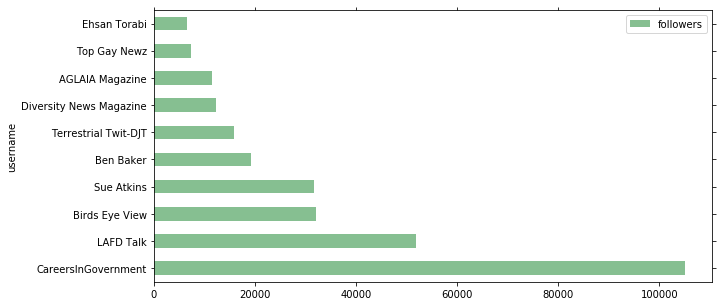

In [30]:

# ***********************************************************************************
#       Find users having most followers - Top 10 followers
# ***********************************************************************************

user_followers = la_tweets[['username','followers']]
#unique UserName
user_followers = user_followers.drop_duplicates().sort_values('followers',ascending=False)
user_followers = user_followers.set_index('username')
# print('Top 10 users by followers:')
# user_followers.head(10)

# find users having most followers
user_followers.reset_index(level=0,inplace = True,drop=False)
user_followers.index += 1
print('Top 10 users by followers:\n')
user_followers_top10 = user_followers.head(10)

user_followers_top10.drop_duplicates()

#print('Top 10 users by followers: \n')
for index, row in user_followers_top10.iterrows():
    print(row['username'],': ', '{:,.0f}'.format(row["followers"]))
    
# Visualization

followers_top10_plot = user_followers_top10.set_index('username')
x = followers_top10_plot.plot(kind='barh', figsize=(10, 5), color='#86bf91', zorder=2, width=0.5)

x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on"
               , left="off", right="off", labelleft="on",labelsize = 10)


In [ ]:
#adjust display of decimals with comma separators on thousands
# pd.options.display.float_format = '{:,.2f}'.format

In [31]:

# ***********************************************************************************
#       Find find min,max, average followers
# ***********************************************************************************

pd.set_option('display.float_format',lambda x: '%.2f' % x)
user_followers.describe()

max_followers = user_followers['followers'].max()
avg_followers = user_followers['followers'].mean()
min_followers = user_followers['followers'].min()
print('Maximum Number of followers: ',max_followers)
print('Avergage Number of followers: ',round(avg_followers,0))
print('Minimum Number of followers: ',min_followers)

pd.reset_option('display.float_format')


Maximum Number of followers:  105108
Avergage Number of followers:  3029.0
Minimum Number of followers:  0


In [60]:

# ***********************************************************************************
#       Analyze the Retweets Percentage
# ***********************************************************************************

#all re-tweets
retweets = la_tweets[la_tweets['text'].str.startswith('RT')==True]
# print('Number of retweets: ',len(retweets))
print('Percentage of retweets {}%'.format(round((len(retweets))/len(la_tweets['text'])*100,2)))

#all direct tweets
direct_tweets = la_tweets[la_tweets['text'].str.startswith('RT')==False]
# print('Number of actual tweets: ',len(direct_tweets))
print('Percentage of actual tweets {}%'.format(round((len(direct_tweets))/len(la_tweets['text'])*100,2)))



Percentage of retweets 45.06%
Percentage of actual tweets 54.94%


Tweets by calender date: 


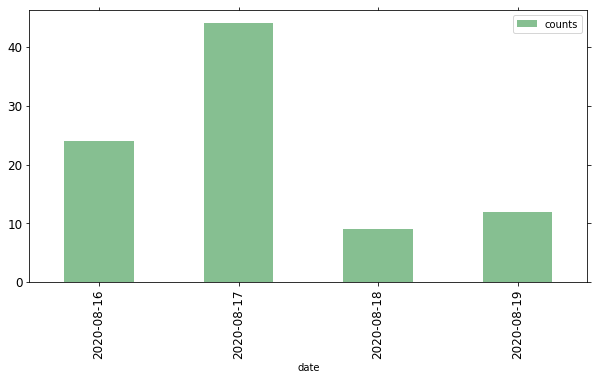

In [39]:

# ***********************************************************************************
#       Analyze tweets trend
# ***********************************************************************************

by_date = direct_tweets.groupby(['date']).size().reset_index(name='counts')
by_date = by_date.set_index('date')
by_date.reset_index(level=0,inplace = True,drop=False)
by_date.index += 1
print('Tweets by calender date: ')
by_date

#bar chart tweets by calender date
by_date_plot = by_date.set_index('date')
ax = by_date_plot.plot(kind='bar', figsize=(10, 5), color='#86bf91', zorder=2, width=0.5)
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on"
               , left="off", right="off", labelleft="on",labelsize = 12)


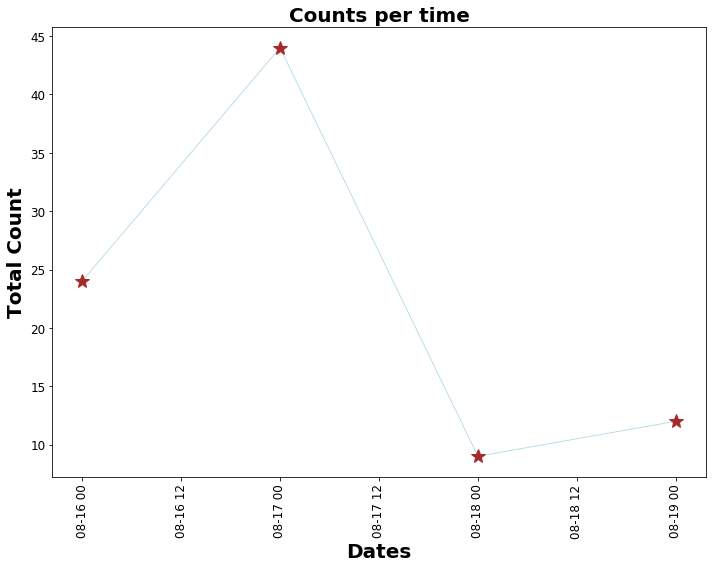

In [54]:
#line chart - Tweets trend by 

plt.figure(figsize=(10,8))
plt.plot(by_date.date, by_date.counts, linewidth=.8, color = 'lightblue')
plt.plot(by_date.date, by_date.counts, '*', markersize=15, color='brown')
plt.xticks(fontsize=12, fontweight='regular',rotation=90)
plt.yticks(fontsize=12, fontweight='regular')
plt.xlabel('Dates',fontsize=20, fontweight='bold')
plt.ylabel('Total Count',fontsize=20, fontweight='bold')
plt.title('Counts per time',fontsize=20, fontweight='bold')
plt.tight_layout()

In [55]:
#number of tweets by day
by_month_by_weekday = direct_tweets.groupby(['monthname','dayname']).size().reset_index(name='counts')
by_month_by_weekday = by_month_by_weekday.set_index('monthname')
by_month_by_weekday.reset_index(level=0,inplace = True,drop=False)
by_month_by_weekday.index += 1
print('Tweets by week day of the Month: ')
by_month_by_weekday

Tweets by week day of the Month: 


,monthname,dayname,counts
1,August,Monday,44
2,August,Sunday,24
3,August,Tuesday,9
4,August,Wednesday,12


In [58]:
#number of tweets by hour of day
by_day_hour = direct_tweets.groupby(['dayname','hour']).size().reset_index(name='counts')
by_day_hour = by_day_hour.set_index('dayname')
by_day_hour.reset_index(level=0,inplace = True,drop=False)
by_day_hour.index += 1
print('Tweets by hour of the day: ')
by_day_hour

Tweets by hour of the day: 


,dayname,hour,counts
1,Monday,0,7
2,Monday,1,7
3,Monday,2,2
4,Monday,3,3
5,Monday,4,3
6,Monday,6,1
7,Monday,12,1
8,Monday,13,1
9,Monday,17,2
10,Monday,19,1


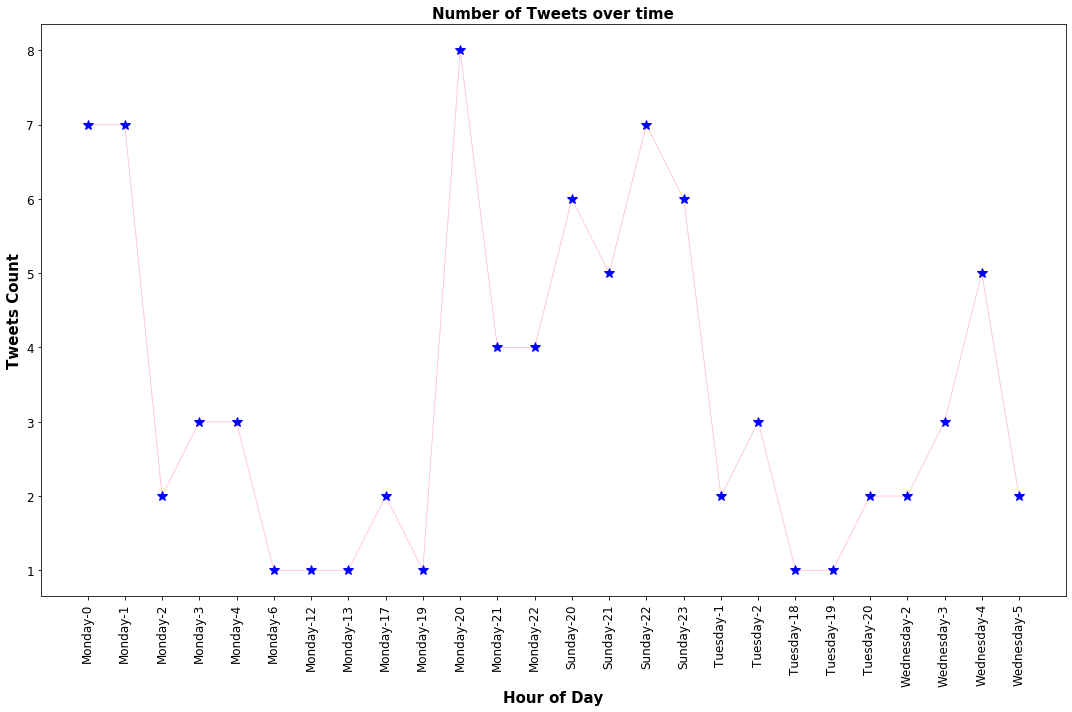

In [57]:
by_day_hour['day_hour'] = by_day_hour['dayname'] + '-'+ by_day_hour['hour'].astype('str')
sel_columns =['day_hour','counts']
by_day_hour_df = pd.DataFrame(by_day_hour,columns = sel_columns)
# tweetsDF = pd.DataFrame(tw_list,columns=ColNames)

plt.figure(figsize=(15,10))
plt.plot(by_day_hour_df.day_hour, by_day_hour_df.counts, linewidth=.8, color ='pink')
plt.plot(by_day_hour_df.day_hour, by_day_hour_df.counts, '*', markersize=10, color='blue')
plt.xticks(fontsize=12, fontweight='regular',rotation=90)
plt.yticks(fontsize=12, fontweight='regular')
plt.xlabel('Hour of Day',fontsize=15, fontweight='bold')
plt.ylabel('Tweets Count',fontsize=15, fontweight='bold')
plt.title('Number of Tweets over time',fontsize=15, fontweight='bold')
plt.grid(False)
plt.tight_layout()

In [44]:
#number of tweets by hour of day
by_platform = direct_tweets.groupby(['platform']).size().reset_index(name='counts').sort_values('counts',ascending=False)
by_platform = by_platform.set_index('platform')
by_platform.reset_index(level=0,inplace = True,drop=False)
by_platform.index += 1
print('Top 5 Platform by users:')
by_platform_top5 = by_platform.head(5)
by_platform_top5


Top 5 Platform by users:


,platform,counts
1,Instagram,26
2,Twitter for iPhone,15
3,Twitter for Android,13
4,Twitter Web App,9
5,Buffer,5


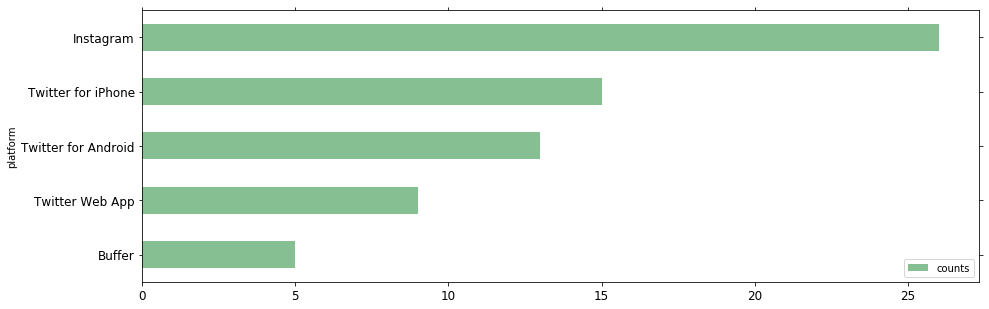

In [35]:
# plt.style.use('fivethirtyeight')
by_platform_top5 = by_platform.sort_values('counts').tail(5)
by_platform_top5 = by_platform_top5.set_index('platform')

ax = by_platform_top5.plot(kind='barh', figsize=(15, 5), color='#86bf91', zorder=2, width=0.5)
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on"
               , left="off", right="off", labelleft="on",labelsize=12)


In [ ]:
# by_platform_top5

In [37]:
by_platform_top5 = by_platform_top5.reset_index()

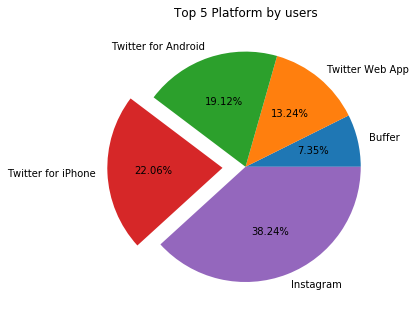

In [38]:
# Pie chart

platform = by_platform_top5['platform']
counts = by_platform_top5['counts']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.pie(counts, labels = platform,autopct='%1.2f%%',explode=(0,0,0,0.2,0))
ax.set_title('Top 5 Platform by users')

plt.show()


In [ ]:
# la_tweets.head()

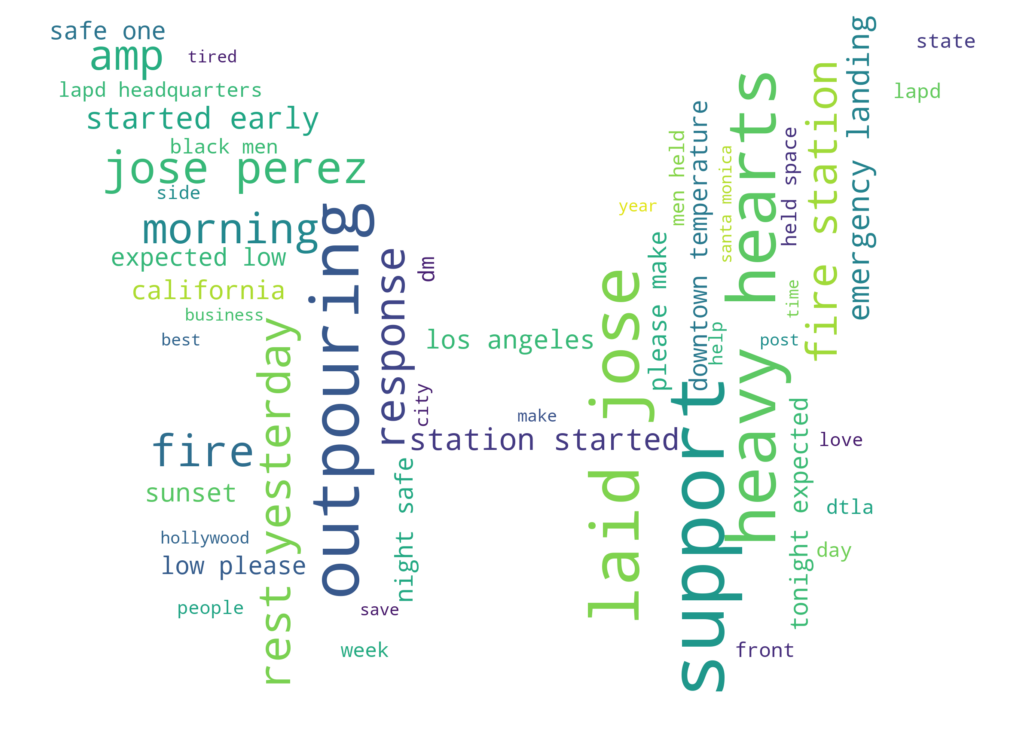

In [59]:
##Wordcloud
tweets = ''
stopwords = set(STOPWORDS)
# Theme and styles for visuals
plt.rcParams['font.family'] = "calibri" # font
# sns.set_context('talk') # visuals outputted for presentation style
plt.style.use('ggplot')

# iterate through the csv file 
for val in la_tweets.tweet: 
    # typecaste each val to string 
    val = str(val) 
#     print('text from tweets: ',len(val),'\n',val)
    # split the value 
    tokens = val.split() 
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 

    for words in tokens: 
        tweets = tweets + words + ' '
        
# print('\nWordcloud bag of words from tweets: ',len(tokens),'\n',val)

#update stopwords list
stopwords.update(['https', 'rt','hi','co','promo', 'code','thank','th','ht'])

custom_mask = np.array(Image.open("butterfly.png")) #buterfly shape wordcloud

wordcloud = WordCloud(max_words=50,width = 1500, height = 900,
            background_color ='white',mask=custom_mask,
            stopwords = stopwords).generate(tweets) 

# plot the WordCloud image                        
plt.figure(figsize = (15, 10), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

In [ ]:
#list db names
twdb.list_collection_names()

In [ ]:
#drop db
# twdb.tweets.drop()

In [ ]:
# !pip install tweet-preprocessor

import preprocessor as p
p.clean('RT @IslamRizza: #RP @slausongirl\n• • • • •\nBlack men held space in front of the LAPD he \
        adquarters in DTLA in support of @DocMellyMel 🙏🏾 It…')

p.clean('Hurricane Awareness: Zephyr Insurance \n\nREAD MORE: https://t.co/SEhxK4bwyi\n\n#Accidents \
                #Claims #DisasterMitigation #Insurance #InsuranceTechnology #InsurTech #Points #RiskMitigation #Technology~ https://t.co/kCrl2YxHfK')